## 提取轮廓

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


## 将cv2与matplotlib 颜色校正

In [2]:
def pltshow(img_bgr):
    img_rgb = np.zeros(img_bgr.shape, img_bgr.dtype)
    img_rgb[:,:,0] = img_bgr[:,:,2]
    img_rgb[:,:,1] = img_bgr[:,:,1]
    img_rgb[:,:,2] = img_bgr[:,:,0]
    plt.imshow(img_rgb) 

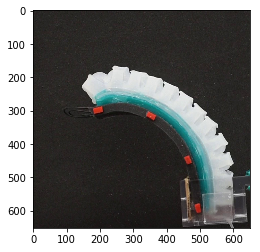

In [27]:
img_init=cv2.imread("/Users/kriny/Desktop/master/final_project/data_process/cut_video/armframe//1045.jpg")    
pltshow(img_init)

### 提取红色区域


In [28]:
def get_red_point(img):
    # 在彩色图像的情况下，解码图像将以b g r顺序存储通道。
    grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 从RGB色彩空间转换到HSV色彩空间
    grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

    # H、S、V范围一：
    lower1 = np.array([0,43,46])
    upper1 = np.array([10,255,255])
    mask1 = cv2.inRange(grid_HSV, lower1, upper1)       # mask1 为二值图像
    res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

    # H、S、V范围二：
    lower2 = np.array([156,43,46])
    upper2 = np.array([180,255,255])
    mask2 = cv2.inRange(grid_HSV, lower2, upper2)
    res2 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask2)

    # 将两个二值图像结果 相加
    mask3 = mask1 + mask2
    return mask3



In [29]:
masks=get_red_point(img_init)

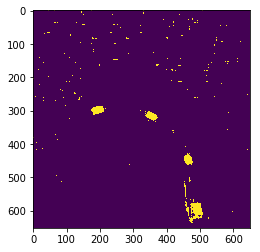

In [30]:
plt.imshow(masks)

### 提取红色轮廓以及坐标

In [31]:
def get_red_contour(img):
    # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
    ret, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
    black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)
    num_count=0
    coordinate=[]
    _,contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if (cv2.contourArea(cnt) < 320):
            continue
        epsilon = 0.01 * cv2.arcLength(cnt,True)
        # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
        num_count=num_count+1
        x, y, w, h = cv2.boundingRect(cnt)
        coordinate.append([x,y,w,h])
        cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
    return black,num_count,coordinate

the num of contour is 4,
the coordinate is[[466, 575, 42, 58], [448, 428, 32, 36], [336, 302, 37, 30], [175, 287, 38, 28]]


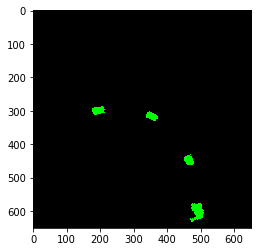

In [32]:
redcon,num,coordinate=get_red_contour(masks)
plt.imshow(redcon)
print("the num of contour is {},\nthe coordinate is{}".format(num,coordinate))

In [33]:
print(x,y,w,h)

NameError: name 'x' is not defined

### 提取主体轮廓

In [34]:
def get_main_contour(img):
    # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
    ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
    black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)

    _,contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if (cv2.contourArea(cnt) < 600):
            continue
        epsilon = 0.01 * cv2.arcLength(cnt,True)
        # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
        cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
        #cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
        #cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
    return black
# cv2.imshow("hull", black)
# cv2.waitKey()
# cv2.destroyAllWindows()


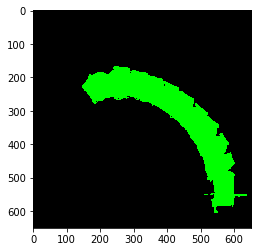

In [35]:
black=get_main_contour(img_init)
plt.imshow(black)

In [36]:
soft_body=redcon+black

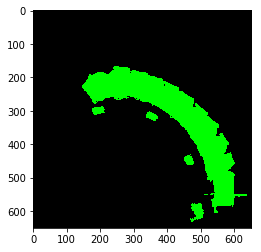

In [37]:
plt.imshow(soft_body)